# Проэкт по А/В тестированию.
 Проэкт разбит на 2 части:
1) Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача
   - Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
   - Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
   - Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
   
2) Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача
Проанализируйте A/B-тест:
   1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
   2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
   3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
   4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
   5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
   6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
   7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
   8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
   9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
  10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
  11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
  12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
  13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
  14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.
  
Предварительно загрузим библиотеки и проверим данные.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

##   Загрузим данные и подготовьте их к анализу.
Загрузите данные. Путь к файлам:

 -   /datasets/visitors.csv. 
 -   /datasets/orders.csv. 
 -   /datasets/hypothesis.csv.

In [2]:
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [3]:
# Проверим на пропуски

print (visitors.isnull().sum())
print (orders.isnull().sum())
print (hypothesis.isnull().sum())

date        0
group       0
visitors    0
dtype: int64
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


In [4]:
# Приведём таблицу к нижнему регистру
hypothesis.columns = map(str.lower, hypothesis.columns)

In [5]:
# Проверим на дубликаты 

print ('дубликаты в visitors:',visitors.duplicated().sum())
print ('дубликаты в orders:',orders.duplicated().sum())
print ('дубликаты в hypothesis:',hypothesis.duplicated().sum())

дубликаты в visitors: 0
дубликаты в orders: 0
дубликаты в hypothesis: 0


In [6]:
# Отформатируем даты в таблицах visitors и orders

visitors['date'] = pd.to_datetime(visitors['date']).dt.date
orders['date'] = pd.to_datetime(orders['date']).dt.date

## Приоретизация гипотез.

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [7]:
# Визуально оценим пример таблицы:

hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [8]:
hypothesis['ICE'] = (hypothesis['impact'] *
                      hypothesis['confidence'])/hypothesis['efforts']

In [9]:
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


Согласно фреймворку ICE, самые перспективные гипотезы с индексами 8,0,7,6!

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [10]:
hypothesis['RICE'] = (hypothesis['reach'] *
                    hypothesis['impact'] *
                      hypothesis['confidence'])/hypothesis['efforts']

In [11]:
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Согласно RICE перспективные гипотезы с индексами 7,2,0,6!

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Приоритезация методов RICE и ICE разная. Если в ICE на первом месте 8 индекс гипотезы, то в RICE эта гипотеза на пятом месте, а на первом 7я, хотя в первом расчетё она на 3 месте. Так получилось из-за параметра reach (охват) - означает охват аудитории. У гипотезы с индексом 8 этот параметр равен единице - фактически минимум, гипотеза с индексом 7 отображает параметр равный 10 - максимум.

## Анализ A/B-теста


Какое распределение в АВ-тесте/ сколько пользователей в каждой группе - по таблице с заказами:

In [12]:
visitors.groupby('group').sum()

,visitors
group,
A,18736
B,18916


In [13]:
print('Начало теста:', visitors['date'].min())
print ('Конец теста:', visitors['date'].max())

Начало теста: 2019-08-01
Конец теста: 2019-08-31


Hе попадают ли какие-то пользователи в обе группы?

In [14]:
# маленький эдхок - стоит ли вообще углубляться в вопрос дублирующих пользователей в группах
print(visitors['visitors'].sum())
print(visitors['visitors'].unique().sum())
# судя по всему рассмортим по ближе.

37652
35180


In [15]:
orders.groupby('visitorId').agg({'group':'nunique'}).query('group > 1').count()

group    58
dtype: int64

In [16]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [17]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.


In [18]:


datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], 
        orders['group'] == x['group'])].agg(
        {'date' : 'max', 
         'group' : 'max',
         'transactionId' : 'nunique',
         'visitorId' : 'nunique', 
         'revenue' : 'sum'}
    ), axis=1).sort_values(by=['date','group']
                          )

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {'date' : 'max', 
         'group' : 'max', 
         'visitors' : 'sum'}
    ), axis=1).sort_values(by=['date','group']
                          )

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated,
    left_on=['date', 'group'],
    right_on=['date', 'group']
)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 


         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   148579       719
1  2019-08-01     B      21      20   101217       713
2  2019-08-02     A      44      38   242401      1338
3  2019-08-02     B      45      43   266748      1294
4  2019-08-03     A      68      62   354874      1845


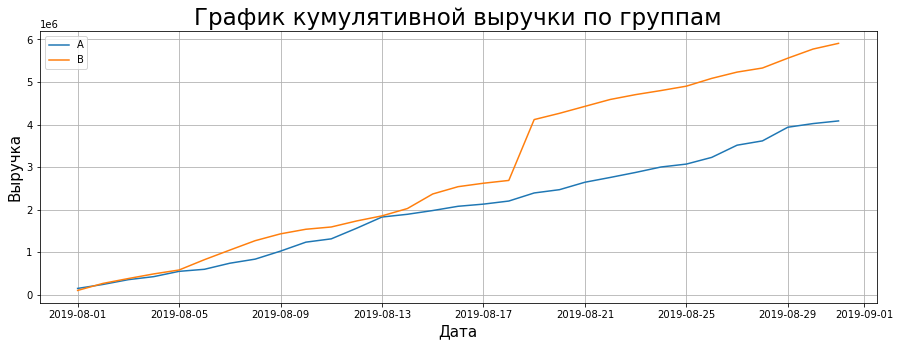

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15, 5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам', size=23)
plt.xlabel("Дата", size=15)
plt.ylabel("Выручка", size=15)
plt.legend()
plt.grid()
plt.show()

18 августа 2019г видим как группа В немного оторвалась, дальше группы показывают параллельный рост. Резкий скачок скорее всего обусловлен аномально большим заказом.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

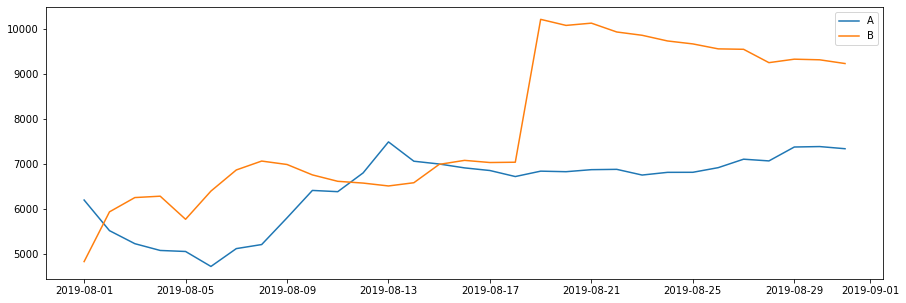

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

График среднего чека показал, что так же 18 августа 2019 года был резкий скачёк среднего чека, в группе В. Возможно это связано с тем, что в группе В часть участников активнее готовились к 1 сентября. Календаль показывает, что это было воскресенье.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

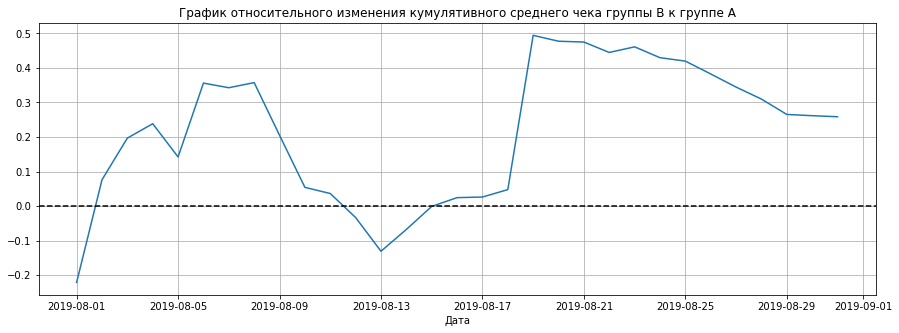

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on='date', right_on='date',
    how='left', 
    suffixes=['A', 'B']
)

plt.figure(figsize=(15, 5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel("Дата")
plt.grid()
plt.show()

В точках экстремумов видны аномально большие покупки.

### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

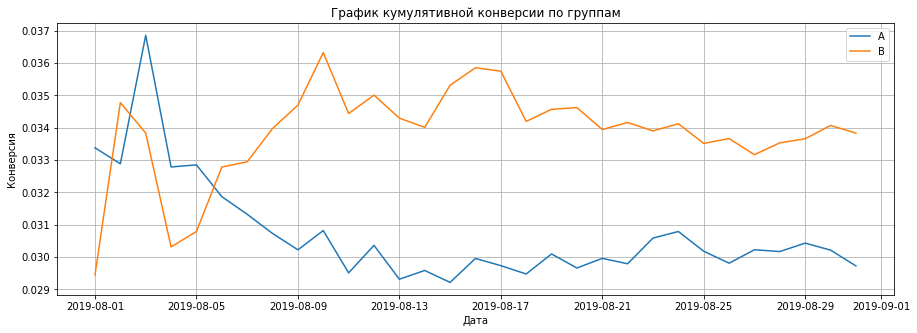

In [22]:
#считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивной конверсии по группам')
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.legend()
plt.grid()
plt.show()

В начале графика конверсия группы А выше, но затем группа В (после 6 августа) вырывается берёт лидерство, дальше графики хоть и ведут себя спокойно и группы идут параллельно.

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

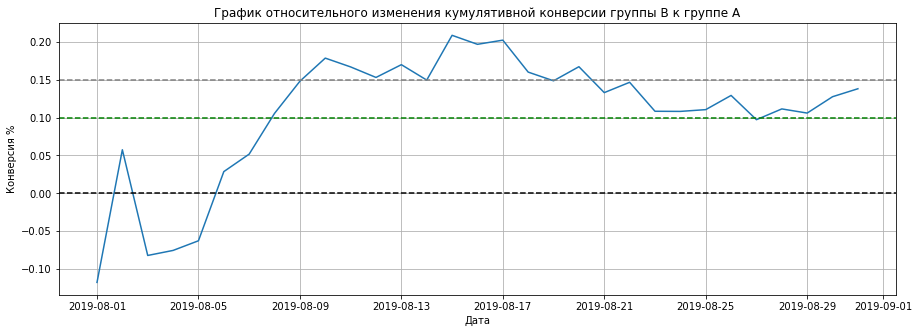

In [23]:
mergedCumulativeConversions = cumulativeDataA[
    ['date','conversion']].merge(
    cumulativeDataB[['date','conversion']],
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axhline(y=0.1, color='green', linestyle='--')

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel("Дата")
plt.ylabel("Конверсия %")
plt.grid()
plt.show()

От 6 августа 2019г группа В лидирует по конверсии, а после 10 августа 2019г обосновался в районе 15% прироста относительно группы А. 

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


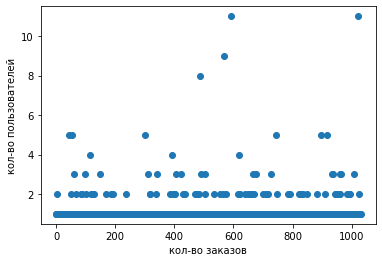

In [24]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.xlabel('кол-во заказов')
plt.ylabel('кол-во пользователей')
plt.show()

Покупателей совершивших действие больше двух раз не очень много, а больше трёх покупок и того мало.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [25]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) # Метод np.percentile('column', [percentile2, percentile3]) находит перцентили.

[2. 4.]


Не больше 5% пользователей совершили больше 2х покупок и 1% совершил 4 покупки.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

      transactionId   visitorId        date  revenue group
425       590470918  1920142716  2019-08-19  1294500     B
1196     3936777065  2108080724  2019-08-15   202740     B
858       192721366  1316129916  2019-08-27    93940     A
1136      666610489  1307669133  2019-08-13    92550     A
744      3668308183   888512513  2019-08-27    86620     B
682      1216533772  4266935830  2019-08-29    78990     B
662      1811671147  4266935830  2019-08-29    78990     A
743      3603576309  4133034833  2019-08-09    67990     A
1103     1348774318  1164614297  2019-08-12    66350     A
1099      316924019   148427295  2019-08-12    65710     A


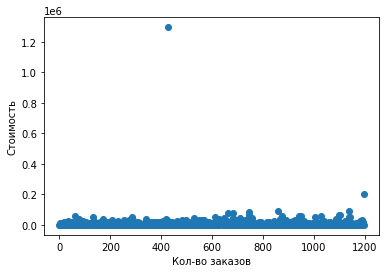

In [26]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.xlabel('Кол-во заказов')
plt.ylabel('Стоимость')
plt.show()

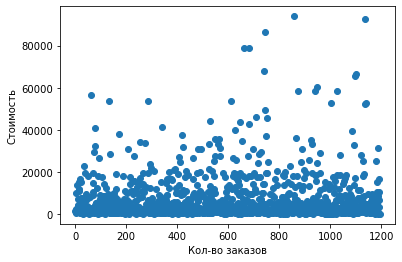

In [27]:
orders_1 = orders[orders['revenue']<200000]
x_values = pd.Series(range(0, len(orders_1['revenue'])))
plt.scatter(x_values, orders_1['revenue']) 

plt.xlabel('Кол-во заказов')
plt.ylabel('Стоимость')
plt.show()

Заказов больше 100 тасяч почти нет. Есть пара выбросов за 15 и 19 числа на 202тыс и 1,29млн.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [28]:
print(orders.head(10))

print(np.percentile(orders['revenue'], [95, 99]))

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
5      182168103   935554773  2019-08-15     2210     B
6      398296753  2900797465  2019-08-15     1860     B
7     2626614568    78758296  2019-08-15     1044     A
8     1576988021   295230930  2019-08-15    13710     A
9     1506739906  1882260405  2019-08-15     1855     B
[28000.  58233.2]


У 5% средний чек на 28тыс - очищая данные будем отталкиваться от этой цифры, у 1% средний чек на чуть больше 58тыс.

### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулируем гипотезы:
 - H₀ - различий в конверсии между группами нет.
 - H₁ -  различия в конверсии между группами есть.

Уровень значимости выберем - 0.05.

In [29]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительная разница конверсии:', "{0:.5f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01              24           148579              21   
1  2019-08-02              20            93822              24   
2  2019-08-03              24           112473              16   
3  2019-08-04              16            70825              17   
4  2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61           

P-value значиительно меньше 0.05, поэтому нулевую гипотезу отвергаем. Относительный прирост группы В к группе А 13.8%

 - date — дата;
 - ordersPerDateA — количество заказов в выбранную дату в группе A;
 - revenuePerDateA — суммарная выручка в выбранную дату в группе A;
 - ordersPerDateB — количество заказов в выбранную дату в группе B;
 - revenuePerDateB — суммарная выручка в выбранную дату в группе B;
 - ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
 - revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
 - ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
 - revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
 - visitorsPerDateA — количество пользователей в выбранную дату в группе A;
 - visitorsPerDateB — количество пользователей в выбранную дату в группе B;
 - visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
 - visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

 - H₀ - Средний чек A равен среднему чеку группы B
 - H₁ - Средний чек A НЕ равен среднему чеку группы B

In [30]:
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительная резница среднего чека:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Относительная резница среднего чека: 0.259


P-value большу 0.05 - статистически значимых отличий в среднем чеке между группами нету. Однако относительное различие среднего чека 25.9%, значит есть аномальные отклонения.

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

 - H₀ - различий в конверсии между группами нет.
 - H₁ -  различия в конверсии между группами есть.

Уровень значимости выберем - 0.05

In [32]:
# Очищаем!! За выбросы примем заказы больше 2х и заказы больше 28тыс.

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId'] # Нижнюю границу очистки мы уже посчитали
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
74


In [34]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница (очищенной) конверсии', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value 0.01304
Относительная разница (очищенной) конверсии 0.173


Всё рабно получаем, что группа В лучше.

После очистки данных от аномалий p-value остался ниже 0.05. Но относительная разница в конверсии группы В к А увеличилась с 0.130 до 0.173.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

 - H₀ - Средний чек A равен среднему чеку группы B
 - H₁ - Средний чек A НЕ равен среднему чеку группы B

Уровень значимости выберем - 0.05

In [35]:
print( 'P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print( 'Относительная резница (очищенного) среднего чека:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.738
Относительная резница (очищенного) среднего чека: -0.020


P-value немного увеличился и по прежнему выше 0.05, однако разница между сегментами сократилась с почти 26% до 2% в пользу группы А.

## Вывод А/В теста.

 - Есть статистически значимое различие по конверсии между группами по сырым данным и после фильтрации аномалий.
 - Как по сырым, так и по отфильтрованным данным - нет статистически значимого различия по среднему чеку между группами.

## При работе с данными были выполнены следующие действия:


Загрузили данные и предварительно с ними ознакомились.

Провели предобработку данных, а именно:

  - Исправили заголовки столбцов и привели их к "хорошему" стилю
  - Изменили тип данных во всех трёх таблицах в столбцах с датами
  - Проверили таблицы на наличие дубликатов (дубликатов нет)
  - Проверили таблицы на наличие пропусков (пропуски отсутствуют)
  - Провели приоритизацию гипотез:

Применили флеймворк ICE

Применили флеймворк RICE

Указали, как изменилась приоритизация гипотез

Провери анализ А/В теста, а именно:

  - Построили график кумулятивной выручки по группам
  - Построили график кумулятивного среднего чека по группам
  - Построили график относительного изменения кумулятивного среднего чека группы B к группе A
  - Построили график кумулятивной конверсии по группам. Сделайте выводы и предположения.
  - Построили график относительного изменения кумулятивной конверсии группы B к группе A.
  - Построили точечный график количества заказов по пользователям
  - Посчитали перцентили количества заказов на пользователя
  - Построили точечный график стоимостей заказов
  - Посчитали перцентили стоимости заказов
  - Посчитали статистическую значимость различий в конверсии между группами по «сырым» данным
  - Посчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
  - Произвели "осчистку" данных от аномалий
  - Посчитали статистическую значимость различий в конверсии между группами по «очищенным» данным
  - Посчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

## Общий итог:

Есть статистически значимое различие по конверсии между группами по сырым данным, и после фильтрации аномалий. Но по сырым, по отфильтрованным данным - нет статистически значимого различия по среднему чеку между группами (раз p-value больше уровня значимости, то никаких отличий между группами нет). Статистическая значимость конверсии после очистки увеличилась с 13.8% до 17.3%

После очистки данных от аномалий - конверсия так же стат значима. А разницы в чеках так же нету. Выбран неблагоприятный промежуток времени для теста - август, в этот период семьи готовят детей в школу, студенты готовятся к учебному году, а те кто по старше выходят из отпусков, однако у обеих групп был шанс проявить тенденцию к росту, но лидигует группа В.

Исходя из обнаруженных фактов, тест следует остановить (Кумулятивная конверсия группы В обосновалась на уровне 15% от группы А) и признать его успешным. Средний чек не поменялся, а конверсия выросла. Группа В лучше чем А, т.к. конверсия больше, при одинаковом среднем чеке, соответственно группа В приносит больше денежных средств бизнесу.